## 线性SVM


[[-0.1   -0.098 -0.096 ...  1.096  1.098  1.1  ]
 [-0.1   -0.098 -0.096 ...  1.096  1.098  1.1  ]
 [-0.1   -0.098 -0.096 ...  1.096  1.098  1.1  ]
 ...
 [-0.1   -0.098 -0.096 ...  1.096  1.098  1.1  ]
 [-0.1   -0.098 -0.096 ...  1.096  1.098  1.1  ]
 [-0.1   -0.098 -0.096 ...  1.096  1.098  1.1  ]]


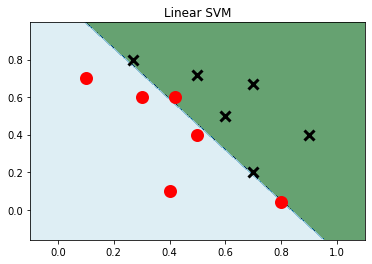

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

data = np.array([
    [0.1, 0.7],
    [0.3, 0.6],
    [0.4, 0.1],
    [0.5, 0.4],
    [0.8, 0.04],
    [0.42, 0.6],
    [0.9, 0.4],
    [0.6, 0.5],
    [0.7, 0.2],
    [0.7, 0.67],
    [0.27, 0.8],
    [0.5, 0.72]
])# 建立数据集
label = [1] * 6 + [0] * 6 #前六个数据的label为1后六个为0
x_min, x_max = data[:, 0].min() - 0.2, data[:, 0].max() + 0.2
y_min, y_max = data[:, 1].min() - 0.2, data[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.002),
                     np.arange(y_min, y_max, 0.002)) # meshgrid如何生成网格
print(xx)
model_linear = svm.SVC(kernel='linear', C = 0.001)# 线性svm
model_linear.fit(data, label) # 训练
Z = model_linear.predict(np.c_[xx.ravel(), yy.ravel()]) # 预测
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.ocean, alpha=0.6)
plt.scatter(data[:6, 0], data[:6, 1], marker='o', color='r', s=100, lw=3) 
plt.scatter(data[6:, 0], data[6:, 1], marker='x', color='k', s=100, lw=3)
plt.title('Linear SVM')
plt.show()

## 多项式SVM
对比不同最高次数的分类情况

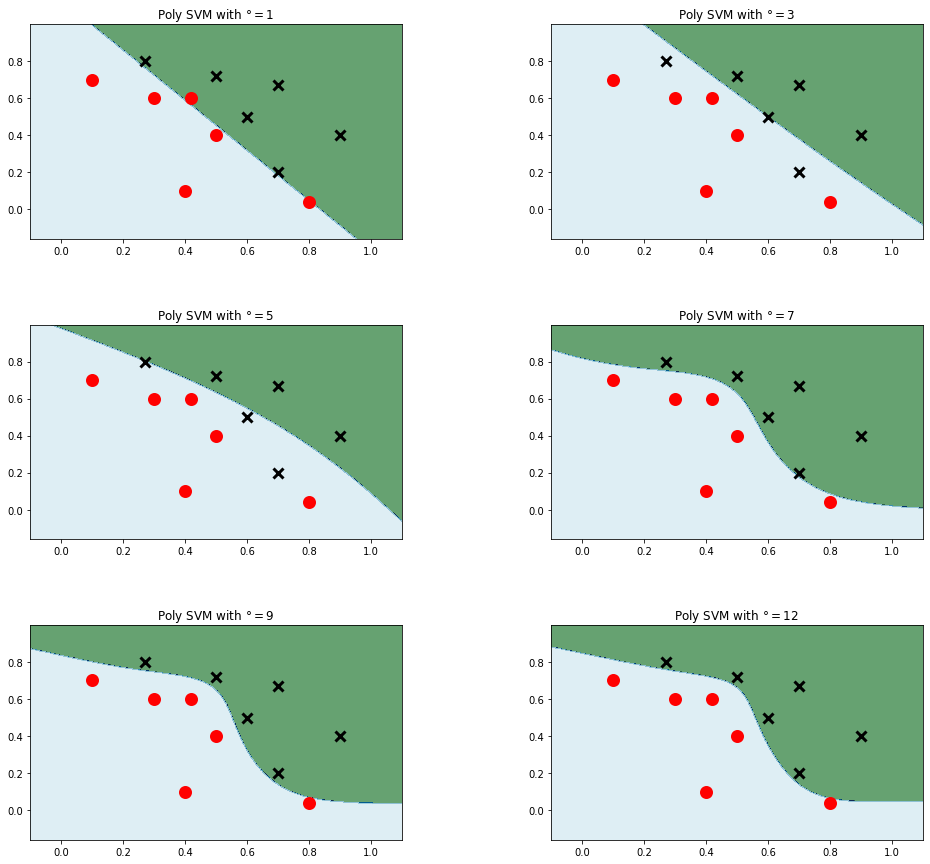

In [6]:
plt.figure(figsize=(16, 15))
 
for i, degree in enumerate([1, 3, 5, 7, 9, 12]):#多项式次数选择了1,3,5,7,9,12
    # C: 惩罚系数，gamma: 高斯核的系数
    model_poly = svm.SVC(C=0.0001, kernel='poly', degree=degree) # 多项式核
    model_poly.fit(data, label)# 训练
    # ravel - flatten
    # c_ - vstack
    # 把后面两个压扁之后变成了x1和x2，然后进行判断，得到结果在压缩成一个矩形
    Z = model_poly.predict(np.c_[xx.ravel(), yy.ravel()])#预测
    Z = Z.reshape(xx.shape)

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.6)
 
    # 画出训练点
    plt.scatter(data[:6, 0], data[:6, 1], marker='o', color='r', s=100, lw=3)
    plt.scatter(data[6:, 0], data[6:, 1], marker='x', color='k', s=100, lw=3)
    plt.title('Poly SVM with $\degree=$' + str(degree))
plt.show()

## 高斯核SVM

对比不同gamma下的分类情况

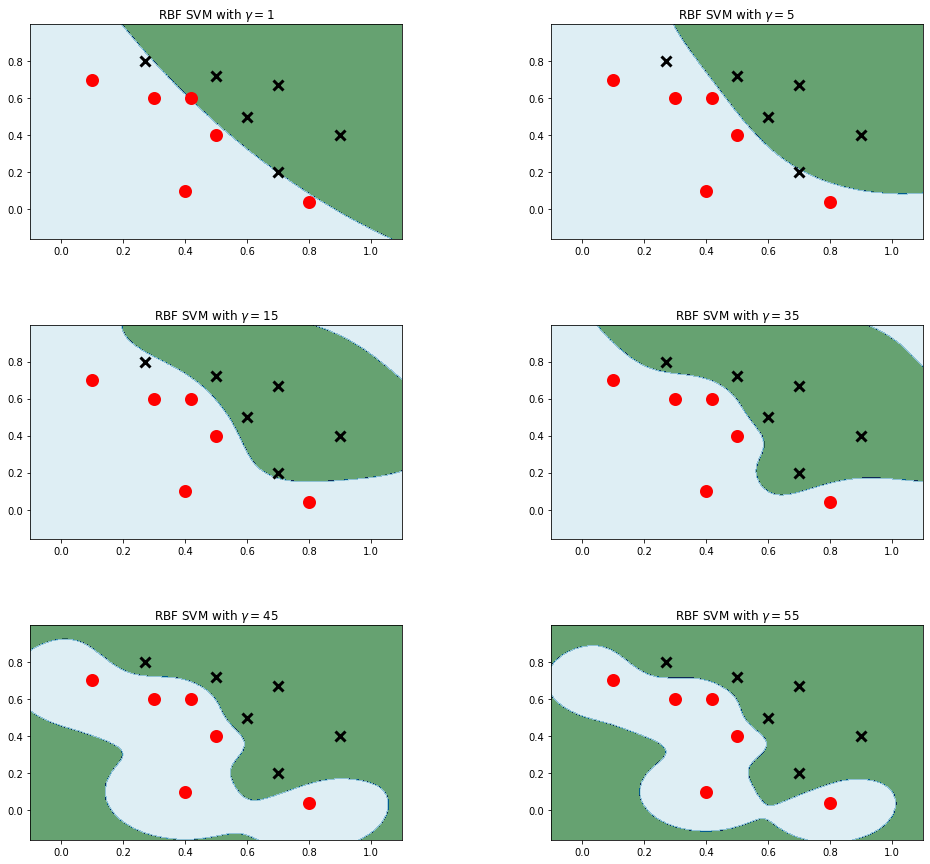

In [3]:
plt.figure(figsize=(16, 15))
 
for i, gamma in enumerate([1, 5, 15, 35, 45, 55]):
    # C: 惩罚系数，gamma: 高斯核的系数
    model_rbf = svm.SVC(kernel='rbf', gamma=gamma, C= 0.0001).fit(data, label)
 
    # ravel - flatten
    # c_ - vstack
    # 把后面两个压扁之后变成了x1和x2，然后进行判断，得到结果在压缩成一个矩形
    Z = model_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.6)
 
    # 画出训练点
    plt.scatter(data[:6, 0], data[:6, 1], marker='o', color='r', s=100, lw=3)
    plt.scatter(data[6:, 0], data[6:, 1], marker='x', color='k', s=100, lw=3)
    plt.title('RBF SVM with $\gamma=$' + str(gamma))
plt.show()

## 测试不同SVM在Mnist数据集上的分类情况

In [10]:
from sklearn import svm
import numpy as np
from time import time
from sklearn.metrics import accuracy_score
from struct import unpack
from sklearn.model_selection import GridSearchCV

def readimage(path):
    with open(path, 'rb') as f:
        magic, num, rows, cols = unpack('>4I', f.read(16))
        img = np.fromfile(f, dtype=np.uint8).reshape(num, 784)
    return img

def readlabel(path):
    with open(path, 'rb') as f:
        magic, num = unpack('>2I', f.read(8))
        lab = np.fromfile(f, dtype=np.uint8)
    return lab

train_data  = readimage("datasets/MNIST/raw/train-images-idx3-ubyte")#读取数据
train_label = readlabel("datasets/MNIST/raw/train-labels-idx1-ubyte")
test_data   = readimage("datasets/MNIST/raw/t10k-images-idx3-ubyte")
test_label  = readlabel("datasets/MNIST/raw/t10k-labels-idx1-ubyte")
print(train_data.shape)
print(train_label.shape)
#数据集中数据太多，为了节约时间，我们只使用前2000张进行训练
train_data=train_data[:2000]
train_label=train_label[:2000]
test_data=test_data[:200]
test_label=test_label[:200]
svc=svm.SVC()
parameters = {'kernel':['rbf'], 'C':[1]}#使用了高斯核
print("Train...")
clf=GridSearchCV(svc,parameters,n_jobs=-1)
start = time()
clf.fit(train_data, train_label)
end = time()
t = end - start
print('Train：%dmin%.3fsec' % (t//60, t - 60 * (t//60)))#显示训练时间
prediction = clf.predict(test_data)#对测试数据进行预测
print("accuracy: ", accuracy_score(prediction, test_label))
accurate=[0]*10
sumall=[0]*10
i=0
j=0
while i<len(test_label):#计算测试集的准确率
    sumall[test_label[i]]+=1
    if prediction[i]==test_label[i]:
        j+=1
    i+=1
print("测试集准确率：",j/200)

(60000, 784)
(60000,)
Train...
Train：0min2.216sec
accuracy:  0.95
测试集准确率： 0.95


In [11]:
parameters = {'kernel':['poly'], 'C':[1]}#使用了多项式核
print("Train...")
clf=GridSearchCV(svc,parameters,n_jobs=-1)
start = time()
clf.fit(train_data, train_label)
end = time()
t = end - start
print('Train：%dmin%.3fsec' % (t//60, t - 60 * (t//60)))
prediction = clf.predict(test_data)
print("accuracy: ", accuracy_score(prediction, test_label))
accurate=[0]*10
sumall=[0]*10
i=0
j=0
while i<len(test_label):#计算测试集的准确率
    sumall[test_label[i]]+=1
    if prediction[i]==test_label[i]:
        j+=1
    i+=1
print("测试集准确率：",j/200)

Train...
Train：0min2.158sec
accuracy:  0.935
测试集准确率： 0.935


In [12]:
parameters = {'kernel':['linear'], 'C':[1]}#使用了线性核
print("Train...")
clf=GridSearchCV(svc,parameters,n_jobs=-1)
start = time()
clf.fit(train_data, train_label)
end = time()
t = end - start
print('Train：%dmin%.3fsec' % (t//60, t - 60 * (t//60)))
prediction = clf.predict(test_data)
print("accuracy: ", accuracy_score(prediction, test_label))
accurate=[0]*10
sumall=[0]*10
i=0
j=0
while i<len(test_label):#计算测试集的准确率
    sumall[test_label[i]]+=1
    if prediction[i]==test_label[i]:
        j+=1
    i+=1
print("测试集准确率：",j/200)

Train...
Train：0min1.431sec
accuracy:  0.955
测试集准确率： 0.955
